<a href="https://colab.research.google.com/github/hamagami/is2024/blob/main/11_PCA_by_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA by sklearn PCA

This code implements PCA using scikit-learn. This approach is much simpler and significantly faster.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
# Generate synthetic data with 3 features
# Creating the data from scratch
np.random.seed(42)
num_samples = 200
num_features = 3
centers = np.array([[3, 3, 3], [-3, -3, -3], [3, -3, 3]])  # Three cluster centers
labels = np.random.choice(len(centers), num_samples)
data = np.array([np.random.randn(num_features) + centers[label] for label in labels])

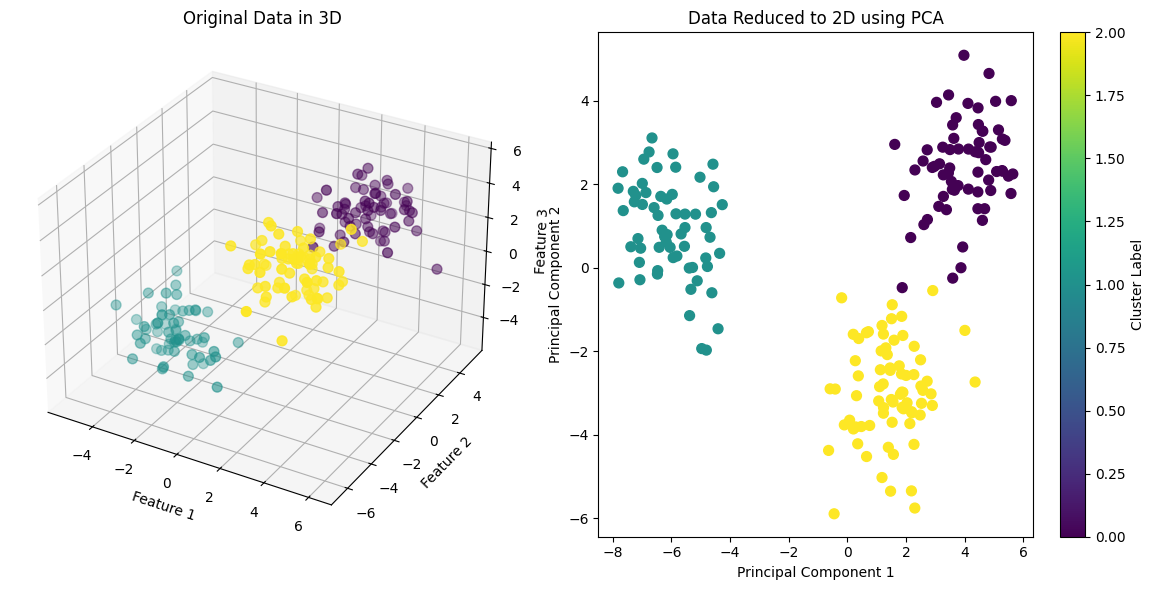

Explained Variance Ratio: [0.69763934 0.25762127]


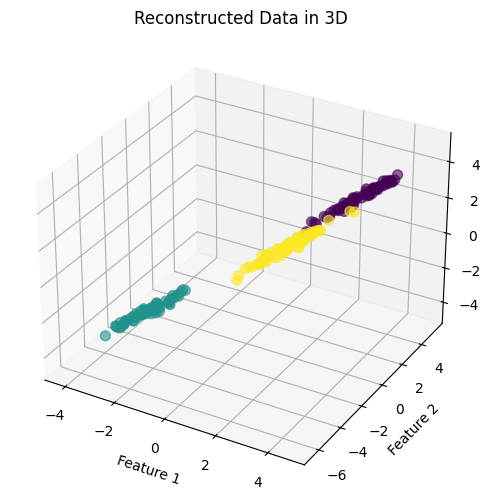

In [3]:
# Plot the original data in 3D
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels, cmap='viridis', s=50)
ax.set_title("Original Data in 3D")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")

# Apply PCA using scikit-learn
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data)

# Plot the reduced data in 2D
ax2 = fig.add_subplot(122)
scatter = ax2.scatter(data_reduced[:, 0], data_reduced[:, 1], c=labels, cmap='viridis', s=50)
ax2.set_title("Data Reduced to 2D using PCA")
ax2.set_xlabel("Principal Component 1")
ax2.set_ylabel("Principal Component 2")
plt.colorbar(scatter, ax=ax2, label="Cluster Label")

plt.tight_layout()
plt.show()

# Explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Reconstruct the data back to 3D space (optional)
data_reconstructed = pca.inverse_transform(data_reduced)

# Plot the reconstructed data in 3D to compare with the original data
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_reconstructed[:, 0], data_reconstructed[:, 1], data_reconstructed[:, 2], c=labels, cmap='viridis', s=50, alpha=0.6)
ax.set_title("Reconstructed Data in 3D")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
plt.show()
